# Local Linear Embedding Example 3
## CS/DSA 5970


In [46]:
import pandas as pd
import numpy as np
import os
import fnmatch
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA, KernelPCA
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import MDS, Isomap, TSNE

##################
# Default parameters
FIGURESIZE=(10,8)
FONTSIZE=24

plt.rcParams['figure.figsize'] = FIGURESIZE
plt.rcParams['font.size'] = FONTSIZE

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

In [17]:
t = np.arange(-1, 1, .001)

x1 = [0.02*random.uniform(-1,1) if (v < .5 and v > -.5) 
      else 2*(1+v)*random.uniform(-1,1) if v <= -.5 
      else 2*(-.5+v)*random.uniform(-1,1) for v in t]
x0 = t
x2 = np.cos(t*5+1.5)

x0 = np.array([x0])
x1 = np.array([x1])
x2 = np.array([x2])
x = np.concatenate([x0, x1, x2], axis=0).T

Text(0, 0.5, 'x1')

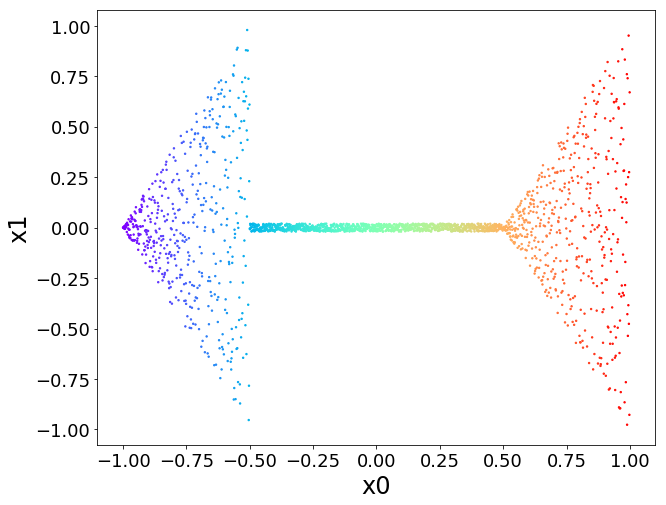

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x[:,0], x[:,1], s=2, c=t, cmap=plt.cm.rainbow)
plt.xlabel('x0')
plt.ylabel('x1')

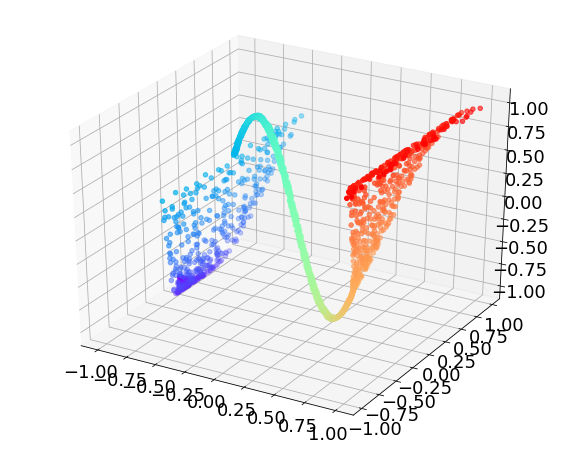

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=t, cmap=plt.cm.rainbow)

## Create LLE Model

In [20]:
model = LocallyLinearEmbedding(n_neighbors=10, n_components=2, 
                               eigen_solver='dense', n_jobs=-1)
model.fit(x)

LocallyLinearEmbedding(eigen_solver='dense', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=2,
            n_jobs=-1, n_neighbors=10, neighbors_algorithm='auto',
            random_state=None, reg=0.001, tol=1e-06)

In [21]:
y = model.transform(x)

In [22]:
y.shape

(2000, 2)

Text(0, 0.5, 'y1')

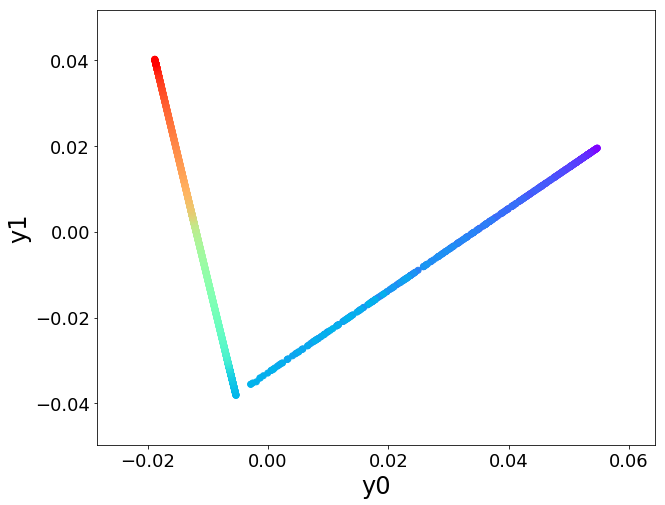

In [23]:
fig, ax = plt.subplots()
ax.scatter(y[:,0], y[:,1], c=t, cmap=plt.cm.rainbow)
#ax.plot(y[::skip], 'r.')
plt.xlabel('y0')
plt.ylabel('y1')

## Create MDS Model

In [24]:
mds = MDS(n_components=2, n_jobs=-1)
# No mds.transform ???
y2=mds.fit_transform(x)

In [25]:
#y2 = mds.transform(x)

Text(0, 0.5, 'y1')

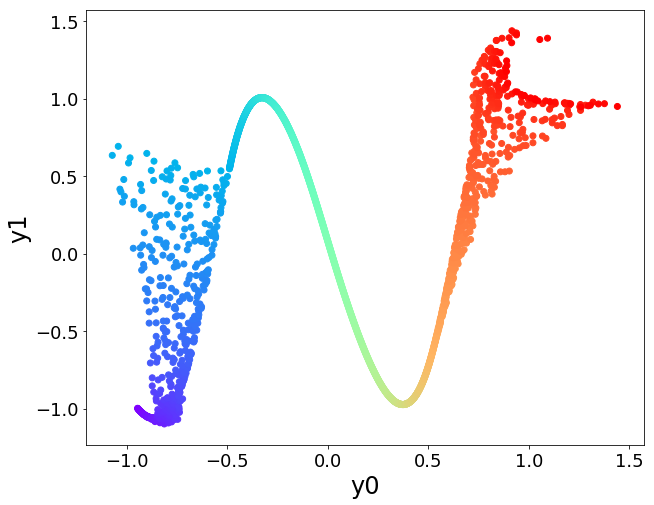

In [26]:
fig, ax = plt.subplots()
skip = 10;
ax.scatter(y2[:,0], y2[:,1], c=t, cmap=plt.cm.rainbow)
#ax.plot(y[::skip], 'r.')
plt.xlabel('y0')
plt.ylabel('y1')

# ISOmap Model

In [43]:
iso = Isomap(n_neighbors=20, n_components=2, 
                               eigen_solver='dense', n_jobs=-1)
iso.fit(x)

Isomap(eigen_solver='dense', max_iter=None, n_components=2, n_jobs=-1,
    n_neighbors=20, neighbors_algorithm='auto', path_method='auto', tol=0)

In [44]:
y3 = iso.transform(x)

Text(0, 0.5, 'y1')

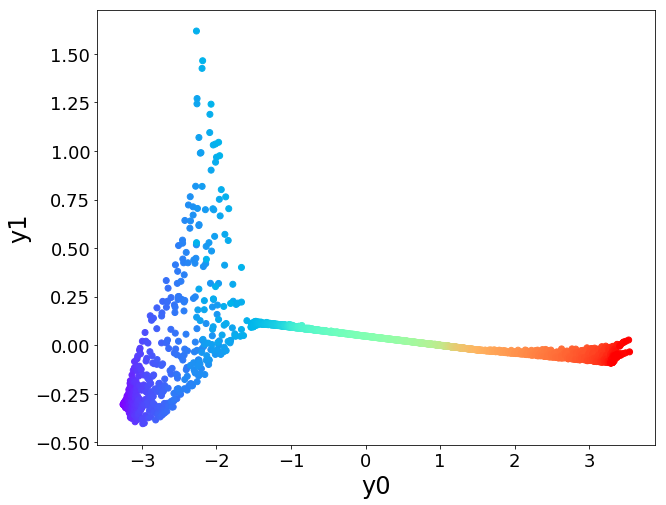

In [45]:
fig, ax = plt.subplots()
ax.scatter(y3[:,0], y3[:,1], c=t, cmap=plt.cm.rainbow)
#ax.plot(y[::skip], 'r.')
plt.xlabel('y0')
plt.ylabel('y1')

# T-SNE

In [51]:
tsne = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
            n_iter_without_progress=300, min_grad_norm=1e-07,
            metric='euclidean', init='random', verbose=0, 
            random_state=None, method='barnes_hut', angle=0.5)
y4 = tsne.fit_transform(x)

In [52]:
#y4 = tsne.transform(x)

Text(0, 0.5, 'y1')

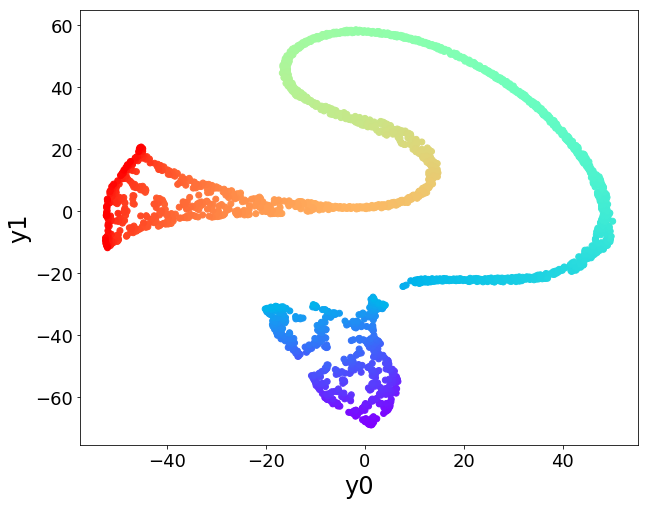

In [53]:
fig, ax = plt.subplots()
ax.scatter(y4[:,0], y4[:,1], c=t, cmap=plt.cm.rainbow)
#ax.plot(y[::skip], 'r.')
plt.xlabel('y0')
plt.ylabel('y1')